In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np
from scipy.spatial.distance import pdist, squareform

import dpp.sampler.dpp as dpp
import dpp.sampler.mcdpp as mcdpp
import dpp.sampler.utils as utils

# currently only support cpu mode
flag_gpu = False

# Construct kernel matrix
Ngrid = 50
X = np.mgrid[-1:1:2./Ngrid, -1:1:2./Ngrid].reshape(2,Ngrid**2).transpose()
pairwise_dists = squareform(pdist(X, 'euclidean'))
L = np.exp(-pairwise_dists ** 2 / 0.5 ** 2)

# Get eigendecomposition of kernel matrix
D, V = utils.get_eig(L, flag_gpu=flag_gpu)

# Samples and plot from unif and standard DPPs
print('DPP-Eigendecomp')
dpp_smpl = dpp.sample(D, V, flag_gpu=flag_gpu)
mc_init = utils.kpp(L, len(dpp_smpl), flag_kernel=True)
print('DPP-MCMC')
mcdpp_smpl = mcdpp.sample(L, 5000, init_rst=mc_init, flag_gpu=flag_gpu)
unif_smpl = np.random.permutation(len(X))[:len(dpp_smpl)]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(X[unif_smpl, 0], X[unif_smpl, 1],'r.',)
plt.title('Unif')

plt.subplot(1,3,2)
plt.plot(X[dpp_smpl, 0], X[dpp_smpl, 1],'b.',)
plt.title('DPP')

plt.subplot(1,3,3)
plt.plot(X[mcdpp_smpl, 0], X[mcdpp_smpl, 1],'g.',)
plt.title('DPP-MC')

plt.savefig('fig/unif-dpp-mcdpp', bbox_inches='tight')


# Samples and plot from unif and k-DPPs
k = 100
E = utils.get_sympoly(D, k, flag_gpu=flag_gpu)

# Samples and plot from unif and standard DPPs
unif_smpl = np.random.permutation(len(X))[:k]
print('kDPP-Eigendecomp')
dpp_smpl  = dpp.sample(D, V, E=E, k=k, flag_gpu=flag_gpu)
print('kDPP-MCMC')
mc_init = utils.kpp(L, k, flag_kernel=True)
mcdpp_smpl = mcdpp.sample(L, 5000, k=k, init_rst=mc_init, flag_gpu=flag_gpu)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(X[unif_smpl, 0], X[unif_smpl, 1],'r.',)
plt.title('Unif')

plt.subplot(1,3,2)
plt.plot(X[dpp_smpl, 0], X[dpp_smpl, 1],'b.',)
plt.title('kDPP')

plt.subplot(1,3,3)
plt.plot(X[mcdpp_smpl, 0], X[dpp_smpl, 1],'g.',)
plt.title('kDPP-MC')

plt.savefig('fig/unif-kdpp-mckdpp', bbox_inches='tight')




In [ ]:
L.shape

In [ ]:
L = np.array([[1,1,2],[2,3,1],[-1,2,2]])

In [ ]:
scores = np.array([1,0,2])

In [ ]:
print(L)
print(scores)

In [1]:
import old_sampler as sampler
import numpy as np

Ngrid = 40
X = np.mgrid[-1:1:2./Ngrid, -1:1:2./Ngrid].reshape(2,Ngrid**2).transpose()

dpp_smpl = sampler.cond_sample_ids(X,np.ones(len(X)),cond_ids=[798,799,800,801,802],k=40,gamma=1)

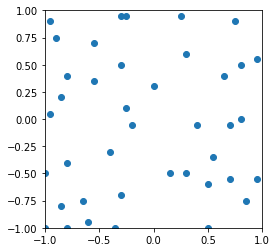

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw(points):
    plt.scatter([x for x, y in points], [y for x, y in points])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal')
    plt.pause(0.05)
    
draw(X[dpp_smpl])

In [ ]:
X[0]